#NetCDF files

NetCDF is a set of software libraries and self-describing, machine-independent data formats that support the creation, access, and sharing of array-oriented scientific data.

Structure of the netCDF file

    netcdf air.sig995.1950 {
    dimensions:
	    lon = 144 ;
	    lat = 73 ;
	    time = UNLIMITED ; // (365 currently)
    variables:
	float lat(lat) ;
		lat:units = "degrees_north" ;
		lat:actual_range = 90.f, -90.f ;
		lat:long_name = "Latitude" ;
		lat:standard_name = "latitude" ;
		lat:axis = "Y" ;
	float lon(lon) ;
		lon:units = "degrees_east" ;
		lon:long_name = "Longitude" ;
		lon:actual_range = 0.f, 357.5f ;
		lon:standard_name = "longitude" ;
		lon:axis = "X" ;
	double time(time) ;
		time:long_name = "Time" ;
		time:delta_t = "0000-00-01 00:00:00" ;
		time:avg_period = "0000-00-01 00:00:00" ;
		time:standard_name = "time" ;
		time:axis = "T" ;
		time:units = "hours since 1800-01-01 00:00:0.0" ;
		time:actual_range = 1314864., 1323600. ;
	float air(time, lat, lon) ;
		air:long_name = "mean Daily Air temperature at sigma level 995" ;
		air:units = "degK" ;
		air:precision = 2s ;
		air:least_significant_digit = 1s ;
		air:GRIB_id = 11s ;
		air:GRIB_name = "TMP" ;
		air:var_desc = "Air temperature" ;
		air:dataset = "NCEP Reanalysis Daily Averages" ;
		air:level_desc = "Surface" ;
		air:statistic = "Mean" ;
		air:parent_stat = "Individual Obs" ;
		air:missing_value = -9.96921e+36f ;
		air:actual_range = 188.53f, 314.9f ;
		air:valid_range = 185.16f, 331.16f ;

    // global attributes:
		:Conventions = "COARDS" ;
		:title = "mean daily NMC reanalysis (1950)" ;
		:description = "Data is from NMC initialized reanalysis\n",
			"(4x/day).  These are the 0.9950 sigma level values." ;
		:platform = "Model" ;
		:references = "http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html" ;
		:history = "created 99/06/07 by Hoop (netCDF2.3)\n",
			"Converted to chunked, deflated non-packed NetCDF4 2014/09" ;
}


##Dimensions

A dimension may be used to represent a real physical dimension, for example, time, latitude, longitude, or height. A dimension might also be used to index other quantities, for example station or model-run-number.

<img src="files/ADAGUC_NetCDF_dimension_scales.jpg">
source: http://trac.osgeo.org/gdal/wiki/ADAGUC

##Variables

Variables are used to store the bulk of the data in a netCDF dataset. A variable represents an array of values of the same type. A scalar value is treated as a 0-dimensional array. A variable has a name, a data type, and a shape described by its list of dimensions specified when the variable is created. A variable may also have associated attributes, which may be added, deleted or changed after the variable is created. 


<img src="files/netcdf-diagram.png">
source: http://www.narccap.ucar.edu/users/user-meeting-08/handout/handout.html

##Attributes

NetCDF attributes are used to store data about the data (ancillary data or metadata), similar in many ways to the information stored in data dictionaries and schema in conventional database systems. Most attributes provide information about a specific variable. These are identified by the name (or ID) of that variable, together with the name of the attribute.

Some attributes provide information about the dataset as a whole and are called global attributes. These are identified by the attribute name together with a blank variable name (in CDL) or a special null "global variable" ID (in C or Fortran). 

##Open NetCDF file

At first we are going to use data from [NCEP reanalysis](http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html). 

In [1]:
from netCDF4 import Dataset

In [2]:
f = Dataset('air.sig995.1950.nc')

In [5]:
f.

SyntaxError: invalid syntax (<ipython-input-5-4f0dd52d028c>, line 1)

In [3]:
f.Conventions

u'COARDS'

In [4]:
f.dimensions

OrderedDict([(u'lon', <netCDF4.Dimension object at 0x7f6a2c1803c0>), (u'lat', <netCDF4.Dimension object at 0x7f6a2c180370>), (u'time', <netCDF4.Dimension object at 0x7f6a2c180320>)])

In [5]:
f.file_format

'NETCDF4_CLASSIC'

In [6]:
f.title

u'mean daily NMC reanalysis (1950)'

In [7]:
f.variables

OrderedDict([(u'lat', <netCDF4.Variable object at 0x7f6a2c1f1e60>), (u'lon', <netCDF4.Variable object at 0x7f6a2c1f1ef0>), (u'time', <netCDF4.Variable object at 0x7f6a2c1f1f80>), (u'air', <netCDF4.Variable object at 0x7f6a2c109050>)])

In [8]:
air = f.variables['air']

In [ ]:
air.

In [9]:
air.long_name

u'mean Daily Air temperature at sigma level 995'

In [10]:
air.size

3836880

In [11]:
air.shape

(365, 73, 144)

In [12]:
air.units

u'degK'

In [13]:
air.ndim

3

##Exersise

 - Get `lat` and `lon` variables from netCDF file
 - What is the shape of this variables? 

getting data from the variable

In [14]:
air_data = air[:]

In [15]:
type(air)

netCDF4.Variable

In [16]:
type(air_data)

numpy.ndarray

In [17]:
air_data.shape

(365, 73, 144)

##Exersise

Acces first day of the dataset 

#Plotting

Easiest way to plot 2d data is to use `imshow` from `matplotlib` module

In [18]:
import matplotlib.pylab as plt
%matplotlib inline

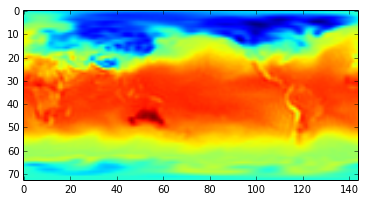

In [19]:
plt.imshow(air_data[0,:,:])

##Additional plotting options

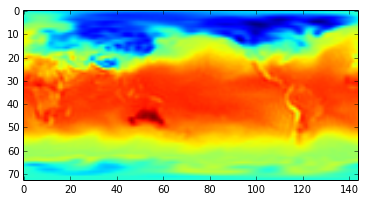

In [20]:
plt.imshow(air_data[0,:,:])

<matplotlib.colorbar.Colorbar instance at 0x7f6a1aa65290>

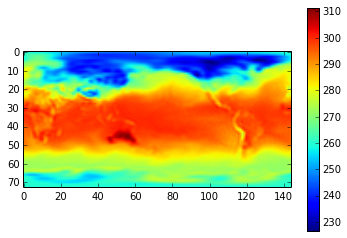

In [21]:
plt.imshow(air_data[0,:,:])
plt.colorbar()

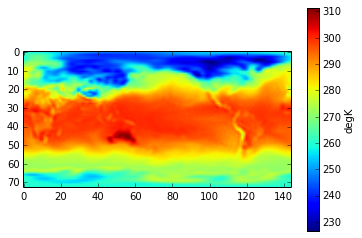

In [22]:
plt.imshow(air_data[0,:,:])
cb = plt.colorbar()
cb.set_label(air.units)

##Exersise

 - Plot data in deg C
 - Change colorbar label

###Limiting ploting range

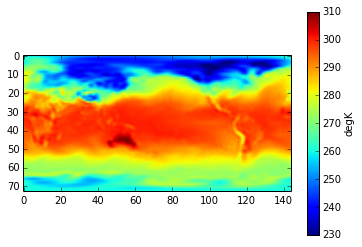

In [23]:
plt.imshow(air_data[0,:,:], vmin=230, vmax=310)
cb = plt.colorbar()
cb.set_label(air.units)

In [24]:
from matplotlib import cm

###Colormaps

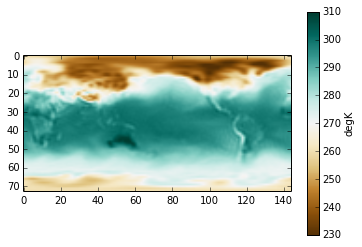

In [25]:
plt.imshow(air_data[0,:,:], vmin=230, vmax=310, cmap=cm.BrBG)
cb = plt.colorbar()
cb.set_label(air.units)

##Exersise

 - find best ever colormap


[Good resource for choosing colors for your map](http://colorbrewer2.org/)

You can also plot 1d plots for your data.

In [26]:
air_data.shape

(365, 73, 144)

##Exersise

- plot time series for one point
- find what are the lat and lon for this data



##Work with time

In [27]:
from netCDF4 import num2date

In [28]:
ttime = f.variables['time']

In [29]:
ttime[:10]

array([ 1314864.,  1314888.,  1314912.,  1314936.,  1314960.,  1314984.,
        1315008.,  1315032.,  1315056.,  1315080.])

In [30]:
ttime.units

u'hours since 1800-01-01 00:00:0.0'

In [31]:
conv_time = num2date(ttime[:], ttime.units)

In [32]:
conv_time[:10]

array([datetime.datetime(1950, 1, 1, 0, 0),
       datetime.datetime(1950, 1, 2, 0, 0),
       datetime.datetime(1950, 1, 3, 0, 0),
       datetime.datetime(1950, 1, 4, 0, 0),
       datetime.datetime(1950, 1, 5, 0, 0),
       datetime.datetime(1950, 1, 6, 0, 0),
       datetime.datetime(1950, 1, 7, 0, 0),
       datetime.datetime(1950, 1, 8, 0, 0),
       datetime.datetime(1950, 1, 9, 0, 0),
       datetime.datetime(1950, 1, 10, 0, 0)], dtype=object)

##Exersise

- plot data for one point with time axis (use plt.xticks(rotation='vertical') to get nicer looking result)

###Plot with Pandas

In [33]:
import pandas as pd

In [34]:
df = pd.DataFrame({'Temp':air_data[:,10,10]}, index=conv_time)

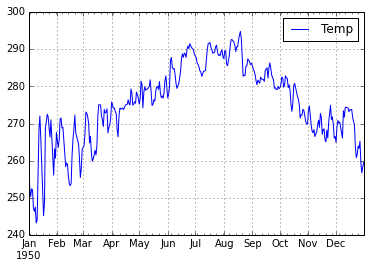

In [35]:
df.plot();

##Exersise

  - resample data to monthly means and plot them

##Select and process 2D data with pandas

In [36]:
dates = pd.to_datetime(conv_time)

In [37]:
mask = dates.month==1

In [38]:
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

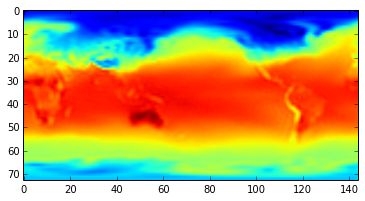

In [39]:
plt.imshow(air_data[mask,:,:].mean(axis=0))

##Exersise

  - create monthly mean for September
  - create summer mean (use `|` operator)
  - create mean of every second day of the month